## Example code to illustrate the API for cNMF on simulated data

 - Current as of June 23, 2022
 - Email dkotliar@broadinstitute.org with questions

## The code below illustrates cNMF using the python class interface. For the command line version, see the PBMC tutorial

## The code below by default does not use any parallelization but provides example commands for using parallel or a UGER scheduler for running the factorization in parallel

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib import gridspec
from cnmf import cNMF

## Download the example data from the web

In [3]:
! wget -O ./example_simulated_data.tar.gz https://storage.googleapis.com/sabeti-public/dkotliar/cNMF/example_data_20191024.tar.gz
! tar -zxvf ./example_simulated_data.tar.gz && rm ./example_simulated_data.tar.gz

--2022-08-16 16:52:36--  https://storage.googleapis.com/sabeti-public/dkotliar/cNMF/example_data_20191024.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.188.16, 142.251.32.48, 142.251.46.176, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.188.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8115726 (7.7M) [application/gzip]
Saving to: ‘./example_simulated_data.tar.gz’

./example_simulated 100%[===================>]   7.74M  11.7MB/s    in 0.7s    

2022-08-16 16:52:37 (11.7 MB/s) - ‘./example_simulated_data.tar.gz’ saved [8115726/8115726]

x ./simulated_example_data/counts.npz
x ./simulated_example_data/filtered_counts.txt
x ./simulated_example_data/groundtruth_cellparams.txt
x ./simulated_example_data/groundtruth_geneparams.txt
x ./simulated_example_data/tsne.txt


## cNMF run parameters

In [4]:
numiter=20 ## Set this to a larger value for real data. We set this to a low value here for illustration
numworkers=1 ## Set this to a larger value and use the parallel code cells to try out parallelization
numhvgenes=1500 ## Number of over-dispersed genes to use for running the factorizations
K = np.arange(5,10)

## Results will be saved to [output_directory]/[run_name] which in this example is simulated_example_data/example_cNMF
output_directory = './simulated_example_data'
run_name = 'example_cNMF'

countfn = './simulated_example_data/filtered_counts.txt'
seed = 14

In [5]:
print(K)

[5 6 7 8 9]


## Prepare the normalized count matrix of highvar genes and the cNMF parameters file assuming no parallelization
 - This will normalize the counts matrix and select the 2000 most over-dispersed genes for running cNMF on.
 - It indicates that it will run 5 NMF iterations each for K=4, 5, 6, 7, and 8. With one worker

In [98]:
cnmf_obj = cNMF(output_dir=output_directory, name=run_name)

In [99]:
cnmf_obj.prepare(
    counts_fn=countfn, 
    components=K, 
    n_iter=numiter, 
    l1_ratio=1.0,
    beta_loss='frobenius',
    seed=seed, 
    num_highvar_genes=numhvgenes,
)

/Users/ricomeinl/Desktop/retro/cNMF/src/cnmf/cnmf.py:442: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  input_counts = sc.AnnData(
/Users/ricomeinl/miniconda3/envs/cnmf/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


## Run the factorization step of cNMF without any parallelization

This might take a few minutes to a half hour depending on how many cores there are on your machine.  You can lower the number of iterations or the K values being considered to speed this up.

As some more explanation, all of the factorization tasks were allocated in the prepare step above to a single worker (worker # 0). We are now executing the factorization steps for that single worker.

In our testing, this took less than a minute to run

In [95]:
cnmf_obj.factorize()

[Worker 0]. Starting task 0.
[Worker 0]. Starting task 1.
[Worker 0]. Starting task 2.
[Worker 0]. Starting task 3.
[Worker 0]. Starting task 4.
[Worker 0]. Starting task 5.
[Worker 0]. Starting task 6.
[Worker 0]. Starting task 7.
[Worker 0]. Starting task 8.
[Worker 0]. Starting task 9.
[Worker 0]. Starting task 10.
[Worker 0]. Starting task 11.
[Worker 0]. Starting task 12.
[Worker 0]. Starting task 13.
[Worker 0]. Starting task 14.
[Worker 0]. Starting task 15.
[Worker 0]. Starting task 16.
[Worker 0]. Starting task 17.
[Worker 0]. Starting task 18.
[Worker 0]. Starting task 19.
[Worker 0]. Starting task 20.
[Worker 0]. Starting task 21.
[Worker 0]. Starting task 22.
[Worker 0]. Starting task 23.
[Worker 0]. Starting task 24.
[Worker 0]. Starting task 25.
[Worker 0]. Starting task 26.
[Worker 0]. Starting task 27.
[Worker 0]. Starting task 28.
[Worker 0]. Starting task 29.
[Worker 0]. Starting task 30.
[Worker 0]. Starting task 31.
[Worker 0]. Starting task 32.
[Worker 0]. Starting

## Combine the replicate spectra into merged spectra files

Now that the individual factorization replicates have been run, we need to combine them into a single file for each value of K tested

In [101]:
cnmf_obj.combine()

Combining spectra factorizations for k=5.
Combining usages factorizations for k=5.
Combining spectra factorizations for k=6.
Combining usages factorizations for k=6.
Combining spectra factorizations for k=7.
Combining usages factorizations for k=7.
Combining spectra factorizations for k=8.
Combining usages factorizations for k=8.
Combining spectra factorizations for k=9.
Combining usages factorizations for k=9.


## Plot the trade-off between error and stability as a function of K to guide selection of K 

There is no perfect way to choose the value of K for cNMF or for any matrix factorization or clustering algorithm. One approach that can be helpful is to plot the trade-off between solution stability and solution error. We can plot that with the command below

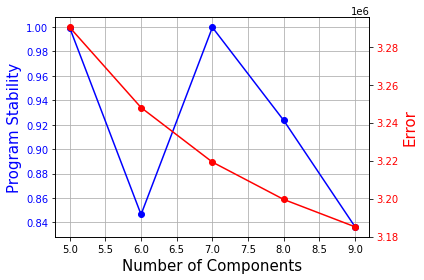

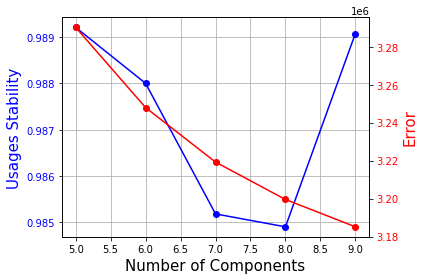

In [102]:
cnmf_obj.k_selection_plot()

### The plot was just saved to ./simulated_example_data/example_cNMF/example_cNMF.k_selection.pdf

Based on the above plot, we would be interested in investigating Ks around K=7 as a starting point as these are values where the stability has plateaued.

## We proceed to obtain the consensus matrix factorization estimates

We first look at how the results look without filtering and then set a threshold for filtering outliers based on the consensus clustergram

In [103]:
selected_K = 7

/Users/ricomeinl/miniconda3/envs/cnmf/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


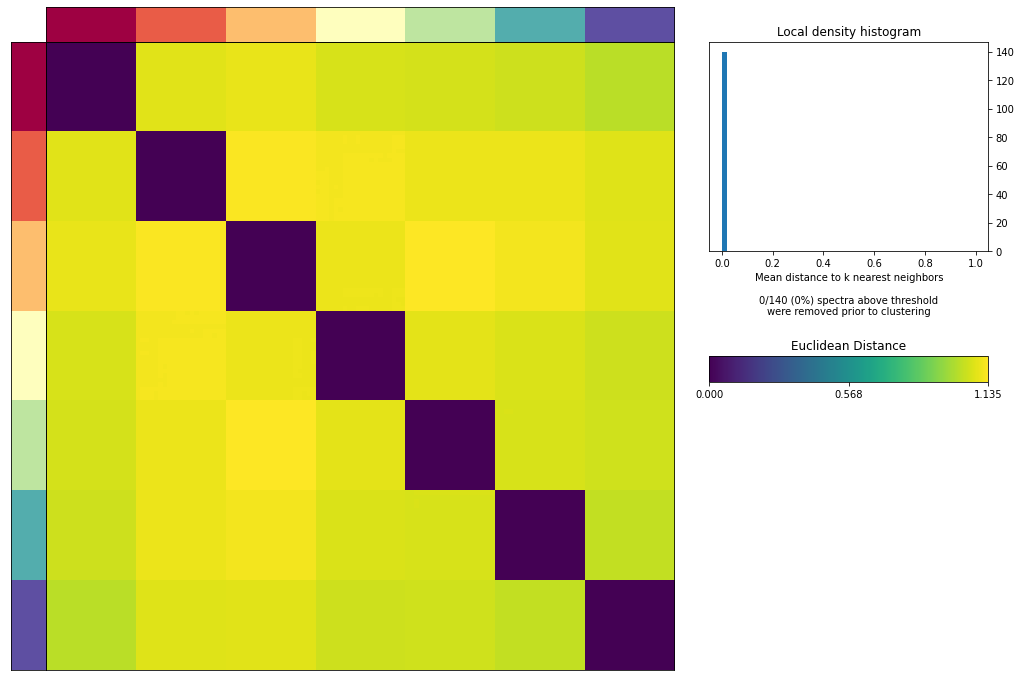

In [104]:
## Setting density_threshold to 2.0 avoids any filtering
cnmf_obj.consensus(k=selected_K, density_threshold=2.0, show_clustering=True)

This looks reasonable. We are finding 7 clusters as expected. In this case, there aren't any noisey outlier components to filter before clustering. However, in general there will be and we would filter them out by setting a threshold on the local density histogram. For example, you could set a threshold of 0.1 like below

/Users/ricomeinl/miniconda3/envs/cnmf/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


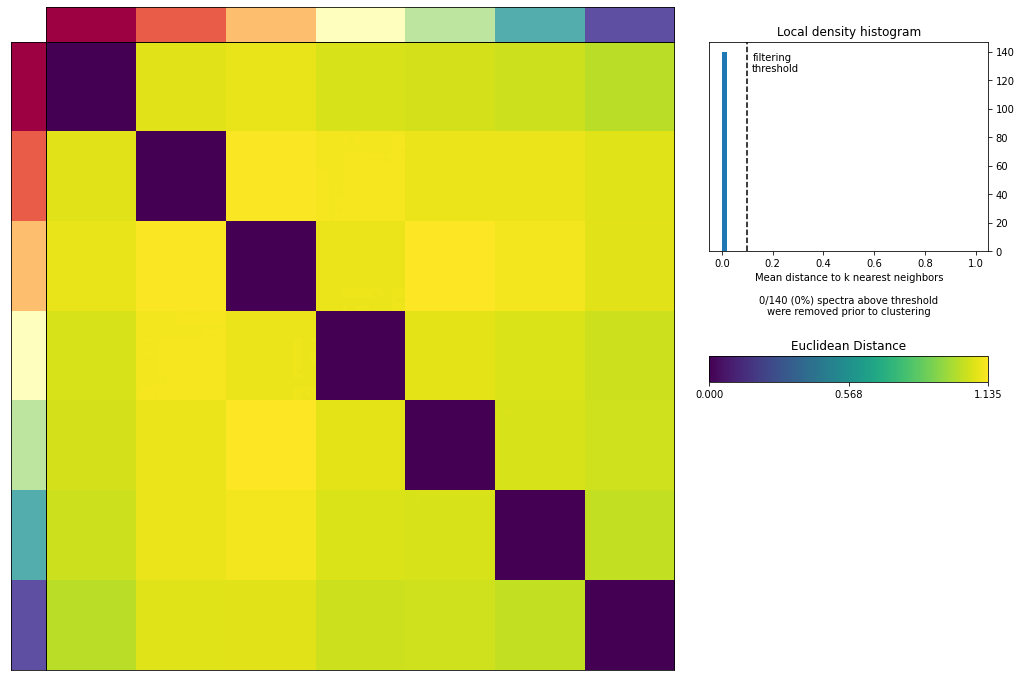

In [105]:
cnmf_obj.consensus(k=selected_K, density_threshold=0.1, show_clustering=True)

In [106]:
### The plots were just saved to example_cNMF.clustering.k_7.dt_2_0.png and example_cNMF.clustering.k_7.dt_0_1.png

In [107]:
! ls simulated_example_data/example_cNMF

cnmf_tmp
example_cNMF.clustering.k_7.dt_0_1.png
example_cNMF.clustering.k_7.dt_2_0.png
example_cNMF.gene_spectra_score.k_7.dt_0_1.txt
example_cNMF.gene_spectra_score.k_7.dt_2_0.txt
example_cNMF.gene_spectra_tpm.k_7.dt_0_1.txt
example_cNMF.gene_spectra_tpm.k_7.dt_2_0.txt
example_cNMF.k_selection_program.png
example_cNMF.k_selection_stats.df.npz
example_cNMF.k_selection_usages.png
example_cNMF.overdispersed_genes.txt
example_cNMF.spectra.k_7.dt_0_1.consensus.txt
example_cNMF.spectra.k_7.dt_2_0.consensus.txt
example_cNMF.usages.k_7.dt_0_1.consensus.txt
example_cNMF.usages.k_7.dt_2_0.consensus.txt


### Our intended final results files are:

 - example_cNMF.gene_spectra_score.k_6.dt_0_40.txt
 - example_cNMF.gene_spectra_tpm.k_6.dt_0_40.txt
 - example_cNMF.usages.k_6.dt_0_40.consensus.txt
 
The first 2 contain the GEPs re-fit to all of the genes either in units of tpm (example_cNMF.gene_spectra_tpm.k_6.dt_0_40.txt) or in Z-score units (example_cNMF.gene_spectra_score.k_6.dt_0_40.txt). The usage matrix is (example_cNMF.usages.k_6.dt_0_40.consensus.txt)

## Now lets make a few plots to illustrate the results

### Run PCA on high-var genes TPM normalized

This step can be skipped if you want to just load the pre-generated tsne results in ./simulated_example_data/tsne.txt

## We can load normalized usages, spectra, and a list of top genes directly from our cnmf object like so

In [108]:
normalized_usage_matrix, gep_scores, gep_tpm, topgenes = cnmf_obj.load_results(K=selected_K, density_threshold=0.1)

## Mean cellscore fraction

In [109]:
def mean_cellscore_fraction(usages, ntop_factors=1):
    """ Get number of cells with a percentage of their total scores
    on a small number of factors

    Parameters
    ----------
    usages : ndarray
        (ncells, nfactors) array of cell scores
    ntop_factors : int, optional (Default: 1)
        number of factors that can count towards domance

    Returns
    -------
    mean_cellscore_fraction : float
        The mean fraction of cells' scores that are contained within
        their top `ntop_factors` highest scoring factors

    """
    totals = np.sum(usages, axis=1)
    ntop_scores = np.sort(usages, axis=1)[:, -ntop_factors:]
    domsum = np.sum(ntop_scores, axis=1)
    domfrac = domsum/totals
    return np.mean(domfrac)


def mean_cellscore_fraction_list(usages):
    """ Make a list of the mean dominant fraction at all possible numbers
        of ntop_factors
    """
    return [mean_cellscore_fraction(usages, i+1)
                for i in range(usages.shape[1])]

In [20]:
mean_cellscore_fraction_list(normalized_usage_matrix)

[0.6908590678269151,
 0.8237300016236142,
 0.8897147792105145,
 0.9356090211903378,
 0.968080595543539,
 0.9892584674148196,
 1.0]

In [49]:
topn = 50

for i in range(len(gep_scores.columns)):
    min_zero = gep_scores.iloc[:, i].sort_values(ascending=False) - gep_scores.iloc[:, i].min() 
    print(min_zero.head(topn).sum() / min_zero.sum())

0.023934425978485364
0.026192300498374847
0.024748017557554697
0.02759934482163961
0.02820139112587496
0.0295701635173547
0.022457737591857124


## This is analogous to loading the files below with the exception that the Usage file contains per-cell usages that are not normalized to sum to 1 whereas the usage returned by load_results is normalized to sum to 1. Normalized usages are the default recommended for most users

In [ ]:
usage_matrix_file = cnmf_obj.paths['consensus_usages__txt'] % (selected_K, '0_1')
usage_matrix_file

In [ ]:
gene_scores_file = cnmf_obj.paths['gene_spectra_score__txt'] % (selected_K, '0_1')
gene_scores_file

In [ ]:
gene_tpm_file = cnmf_obj.paths['gene_spectra_tpm__txt'] % (selected_K, '0_1')
gene_tpm_file

### We can then plot the ground truth as well as the cNMF inferences on a tSNE plot to visualize the accuracy of the inference

In [ ]:
tsne_results = pd.read_csv('./simulated_example_data/tsne.txt', sep='\t', index_col=0)
tsne_results.head()

In [ ]:
import palettable
from matplotlib import rcParams
from collections import Counter

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Myriad Pro']

rcParams['axes.titlesize'] = 9
rcParams['axes.labelsize'] = 9
rcParams['xtick.labelsize'] = 7
rcParams['ytick.labelsize'] = 7

rcParams['xtick.major.pad']='1'
rcParams['ytick.major.pad']='1'

import matplotlib as mpl
label_size = 8

core_colors = type('CoreColors', (), {})

cnames = ['red', 'blue', 'green', 'purple', 'orange', 'yellow', 'brown', 'pink', 'grey']

def to_array_col(color):
    return np.array(color)/255.

for cname,c in zip(cnames, palettable.colorbrewer.qualitative.Set1_9.colors):
    setattr(core_colors, cname, np.array(c)/255.)
    
for cname, c in zip(['blue', 'green', 'red', 'orange', 'purple'],
                    palettable.colorbrewer.qualitative.Paired_10.colors[::2]):
    setattr(core_colors, 'pale_'+cname, np.array(c)/255.)
    
core_colors.teal = to_array_col(palettable.colorbrewer.qualitative.Set2_3.colors[0])
core_colors.brown_red = to_array_col(palettable.colorbrewer.qualitative.Dark2_3.colors[1])

# core_colors.light_grey = to_array_col(palettable.colorbrewer.qualitative.Set2_8.colors[-1])
core_colors.light_grey = to_array_col(palettable.tableau.TableauLight_10.colors[7])

core_colors.royal_green = to_array_col(palettable.wesanderson.Royal1_4.colors[0])


In [ ]:
celldata = pd.read_csv('./simulated_example_data/groundtruth_cellparams.txt', sep='\t', index_col=0)
celldata.head()

In [ ]:
tsnedat = pd.merge(left=tsne_results, right=celldata, left_index=True, right_index=True)

tsnedat['extra-status'] = 'Normal'
tsnedat.loc[tsnedat['has_program'] & ~tsnedat['is_doublet'], 'extra-status'] = 'program'
tsnedat.loc[~tsnedat['has_program'] & tsnedat['is_doublet'], 'extra-status'] = 'doublet'
tsnedat.loc[ tsnedat['has_program'] & tsnedat['is_doublet'], 'extra-status'] = 'program & doublet'

In [ ]:
cell_tableau10_color_id = tsnedat['group'].astype(int).values - 1
cell_tableau10_color = np.array(palettable.tableau.Tableau_10.colors[:-1])[cell_tableau10_color_id]/255.

activity_color = np.zeros((tsnedat.shape[0], 4))
activity_color[:, 3] = tsnedat['has_program'].astype(float)
doublet_color = np.array(palettable.tableau.TableauMedium_10.colors[5])/255. 

In [ ]:
normal_filter = tsnedat['extra-status'] == 'Normal'
doublet_filter = tsnedat['extra-status'] == 'doublet'
activity_filter = tsnedat['extra-status'] == 'program'
activity_and_doublet_filter = tsnedat['extra-status'] == 'program & doublet'

In [ ]:
identityK = 6
fig = plt.figure(figsize=(1.5, 2), dpi=600)
gs = gridspec.GridSpec(3, 1, fig, 0,0,1,1,
                       hspace=0, wspace=0,
                       height_ratios=[0.2, 1.5, 0.3],
                       width_ratios=[1])

ax = fig.add_subplot(gs[1, 0],
          xscale='linear', yscale='linear',
          frameon=False, xticks=[], yticks=[])

x = tsnedat['TSNE1']
y = tsnedat['TSNE2']


curr_filter = normal_filter


ax.scatter(x[curr_filter], y[curr_filter],
          facecolor=cell_tableau10_color[curr_filter.values],
           edgecolor='none',
           rasterized=True, s=2)

curr_filter = activity_filter
ax.scatter(x[curr_filter], y[curr_filter],
          facecolor=cell_tableau10_color[curr_filter.values],
          edgecolor=activity_color[curr_filter.values], linewidth=0.33,
           rasterized=False, s=2)


curr_filter = doublet_filter | activity_and_doublet_filter
ax.scatter(x[curr_filter], y[curr_filter],
          c=doublet_color,
          edgecolor='none', marker='x', linewidth=0.4,
          s=1)

curr_filter = activity_and_doublet_filter
ax.scatter(x[curr_filter], y[curr_filter],
          facecolor='none',
          edgecolor=activity_color[curr_filter.values], linewidth=0.33,
           rasterized=False, s=2)


ax = fig.add_subplot(gs[0, 0],
          frameon=False, xticks=[], yticks=[], xlim=[0,1], ylim=[0,1])

ax.text(0.50, 0.5, 'Simulation overview', va='center', ha='center', fontsize=9, fontdict=dict(weight='bold'),
        clip_on=False)


ax = fig.add_subplot(gs[2, 0],
          frameon=False, xticks=[], yticks=[], xlim=[0,1], ylim=[0,1])

ax.text(0.50, 0.9, '%d cell identity programs' % identityK, va='center', ha='center', fontsize=7,
        clip_on=False)

leg_x = np.arange(identityK)/18
leg_x -= leg_x.mean()
leg_x += 0.5

ax.scatter(leg_x, np.ones(identityK)*0.65, c=np.array(palettable.tableau.Tableau_10.colors[:identityK])/255, s=3)



activity_y = 0.30
ax.text(0.33, activity_y, '  activity', verticalalignment='center', ha='center', fontsize=7,
        clip_on=False)

ax.scatter([0.21], [activity_y], 
           facecolor='none', edgecolor='k', linewidth=0.8, s=4)


doub_y = activity_y
ax.text(0.66, doub_y, '     doublets', verticalalignment='center', ha='center', fontsize=7,
        clip_on=False)

ax.scatter([0.54], [doub_y], c=[doublet_color],
           edgecolor='none', marker='x', linewidth=0.8, s=4, clip_on=False)

ax.set_xlim([0,1])
ax.set_ylim([0,1])

In [ ]:
tsne_and_usages = pd.merge(left=normalized_usage_matrix, right=tsne_results, left_index=True, right_index=True)
tsne_and_usages.head()

In [ ]:
tsne_and_usages.columns

In [ ]:
cmap = palettable.cartocolors.sequential.Sunset_7.get_mpl_colormap()

(fig,axes) = plt.subplots(3,3, figsize=(5,4), dpi=400)
axes = axes.ravel()
for i in range(1, selected_K+1):
    sc = axes[i-1].scatter(tsne_and_usages['TSNE1'], tsne_and_usages['TSNE2'], c=tsne_and_usages[i],
                      cmap=cmap, vmin=0, vmax=1.,
                      s=2, edgecolor='none', rasterized=True)
    axes[i-1].set_title(i)
    axes[i-1].set_xticks([])
    axes[i-1].set_yticks([])
    
    
    
plt.tight_layout()
cbarax = fig.add_axes([1,.7,.02, .2])
plt.colorbar(sc, cax=cbarax)
_ = plt.figtext(.45,1,'GEP Usage', fontsize=15)
axes[-1].remove()
axes[-2].remove()

The plot above shows which cells are expressing which programs. Program 6 is distributed over cells of multiple identity programs and therefore corresponds to the activity program. GEP 1,2 3, 4, 5, 7 correspond to distinct identity programs

## We might also want to investigate which genes are driving which programs. The top_genes ranks the genes most associated with each GEP (based on the spectra_scores)

In [ ]:
topgenes.head(20)